Successfully loaded data from 'protein.csv'.
Data Head:
                  RedMeat   WhiteMeat   Eggs   Milk   Fish   Cereals   Starch  \
Country                                                                        
Albania             10.1         1.4    0.5    8.9    0.2      42.3      0.6   
Austria              8.9        14.0    4.3   19.9    2.1      28.0      3.6   
Belgium             13.5         9.3    4.1   17.5    4.5      26.6      5.7   
Bulgaria             7.8         6.0    1.6    8.3    1.2      56.7      1.1   
Czechoslovakia       9.7        11.4    2.8   12.5    2.0      34.3      5.0   

                 Nuts   Fr&Veg  
Country                         
Albania           5.5      1.7  
Austria           1.3      4.3  
Belgium           2.1      4.0  
Bulgaria          3.7      4.2  
Czechoslovakia    1.1      4.0  

Performing hierarchical clustering on 25 countries using 9 features.

Displaying the dendrogram...


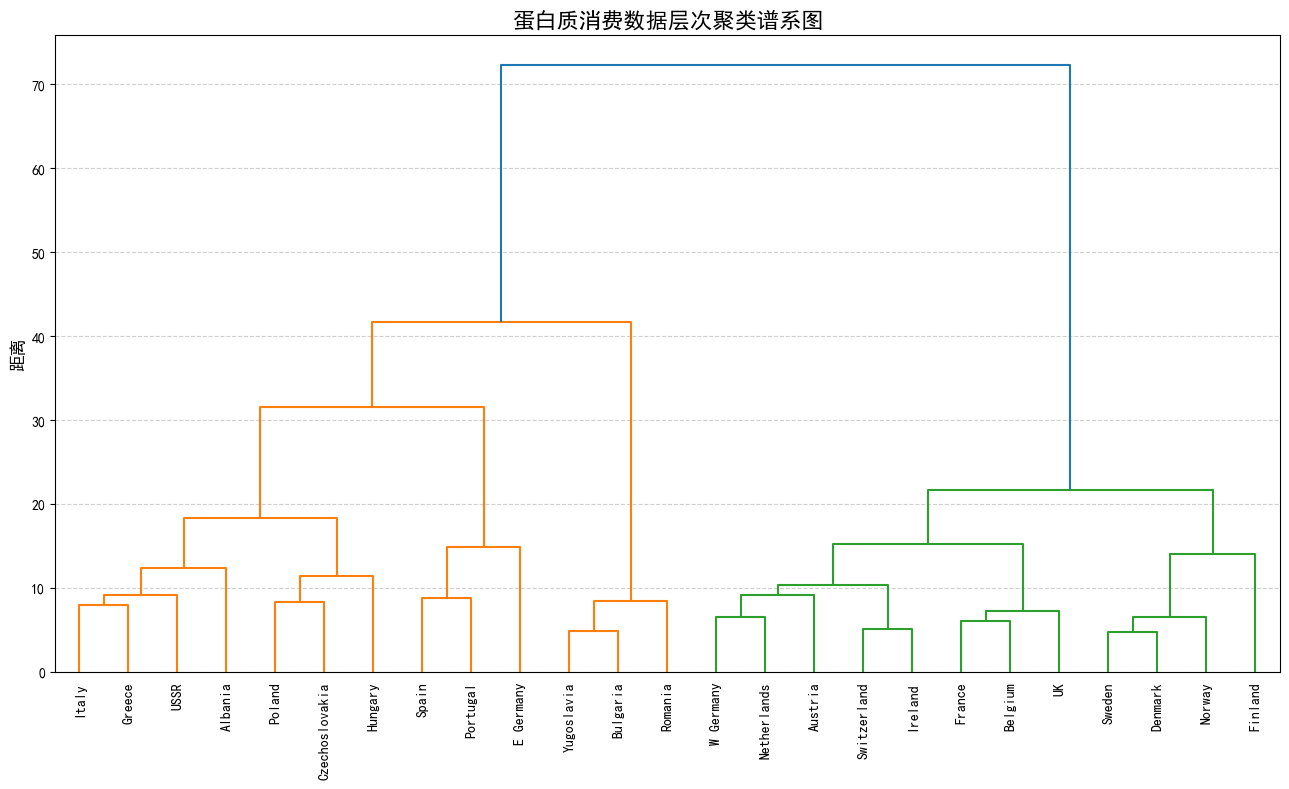


Dendrogram generation complete.


In [4]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

csv_file_path = 'protein.csv'

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. Load the dataset
protein_data = pd.read_csv(csv_file_path, index_col=0)
print(f"Successfully loaded data from '{csv_file_path}'.")
# Display first few rows and info to verify
print("Data Head:\n", protein_data.head())

# 2. Prepare the data for clustering
# Extract the numerical feature data (the 9 protein source columns)
features = protein_data.values
# Extract the country names (labels for the dendrogram)
country_labels = protein_data.index.tolist()

# Check if data is loaded correctly
if features.shape[0] == 0 or features.shape[1] == 0:
    print("Error: No data found after loading. Check the CSV file format.")
    exit()
if len(country_labels) != features.shape[0]:
     print("Error: Mismatch between number of labels and data rows.")
     exit()

print(f"\nPerforming hierarchical clustering on {features.shape[0]} countries using {features.shape[1]} features.")

# 3. Perform Hierarchical Clustering
# Use the 'ward' linkage method, which tends to find compact, similarly sized clusters.
# Other common methods: 'average', 'complete', 'single'.
# The 'linkage' function computes the distances between clusters.
linked = linkage(features, method='ward')

# 4. Generate and Display the Dendrogram (谱系图)
plt.figure(figsize=(13, 8)) # Create a figure with a specified size for better readability

# Create the dendrogram
dendrogram(linked,
           orientation='top',         # Display the dendrogram vertically
           labels=country_labels,     # Use country names as labels on the x-axis
           distance_sort='descending',# Sort the distances for better visualization
           show_leaf_counts=False,    # Do not show counts in parentheses for leaves
           leaf_rotation=90,          # Rotate the x-axis labels (country names) vertically
           leaf_font_size=10)         # Set the font size for the labels

# Customize the plot
plt.title('蛋白质消费数据层次聚类谱系图', fontsize=16) # Set the title in Chinese
plt.ylabel('距离', fontsize=12)                     # Set the y-axis label in Chinese
# plt.xlabel('国家')                                  # X-axis label is implicitly countries
plt.grid(axis='y', linestyle='--', alpha=0.6)        # Add horizontal grid lines
plt.tight_layout()                                  # Adjust layout to prevent labels overlapping

# Show the plot
print("\nDisplaying the dendrogram...")
plt.show()

print("\nDendrogram generation complete.")